In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
np.random.seed(42)
X,y = make_regression(n_samples=300, n_features=1, noise=10, random_state=42)
y= y + 2*X.flatten()**2 - 3*X.flatten()**3 + np.random.normal(0,10,len(y))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

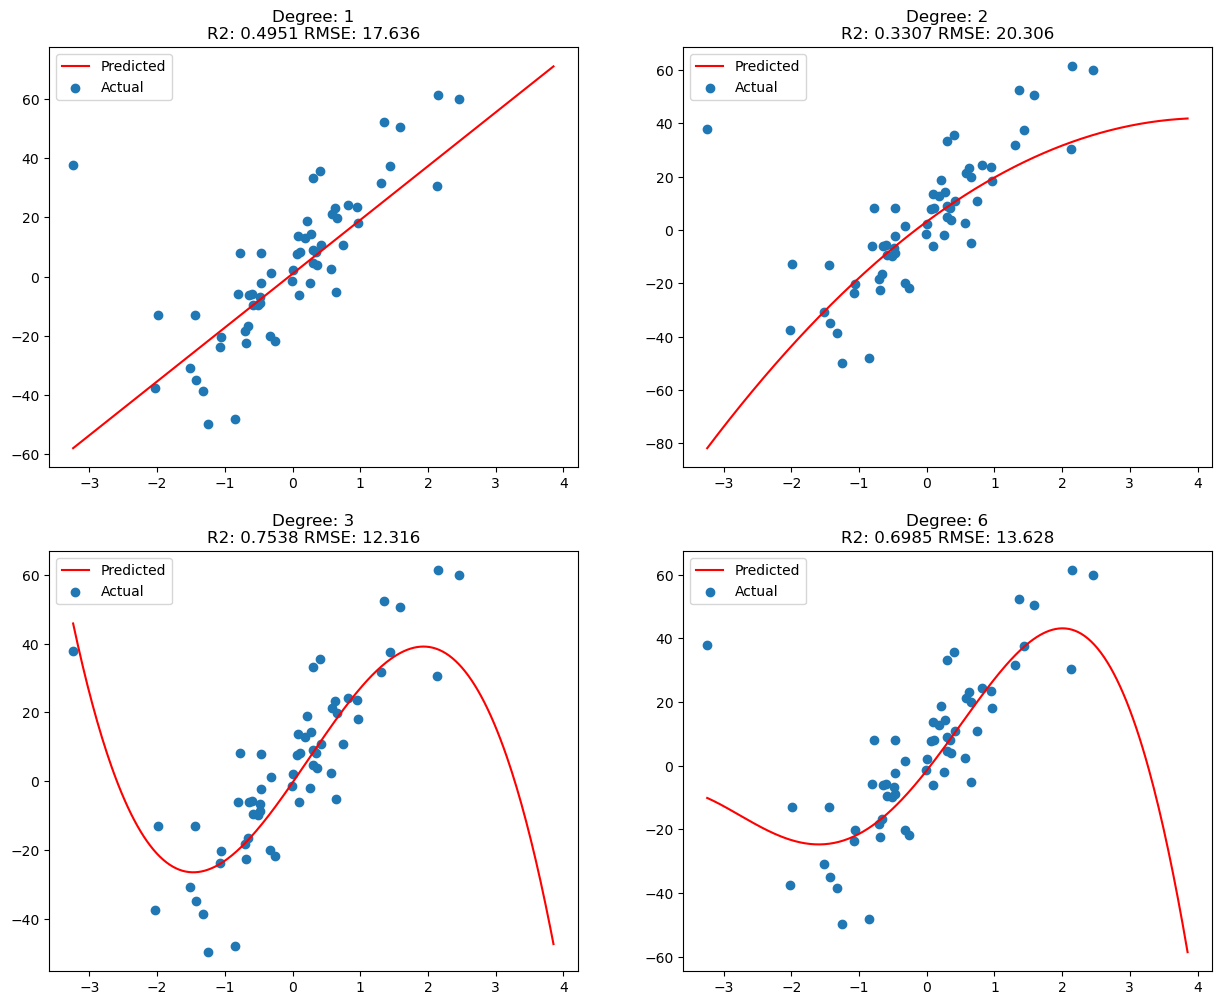

In [8]:
degrees=[1,2,3,6]
fig,axes = plt.subplots(2,2,figsize=(15,12))
for ax,degree in zip(axes.flatten(),degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2,rmse = r2_score(y_test,y_pred), np.sqrt(mean_squared_error(y_test,y_pred))

    X_curve = np.linspace(X.min(),X.max(),300).reshape(-1,1)
    ax.plot(X_curve,model.predict(X_curve),label='Predicted', color='red')
    ax.scatter(X_test,y_test,label='Actual')
    ax.legend()
    ax.set_title(f"Degree: {degree}\nR2: {r2:.4f} RMSE: {rmse:.3f}")